# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Import Dataset

In [3]:
file_id = '1NymXycS8dNVQclR3Pn394bSlRWTEf9hm'
url = f'https://drive.google.com/uc?id={file_id}'
email = pd.read_csv(url)
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email["Category"].value_counts()

,count
Category,
ham,4825
spam,747


In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Cleaning

In [6]:
email.isnull().sum()

,0
Category,0
Message,0


In [7]:
email.duplicated().sum()

np.int64(415)

In [8]:
email = email.drop_duplicates()

In [9]:
le = LabelEncoder()
email['Category'] = le.fit_transform(email['Category'])

In [10]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int64 
 1   Message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


# EDA

In [11]:
email = email.rename(columns={'Category' : 'target'})
email.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
email['num_character'] = email['Message'].apply(len)
email['num_word'] = email['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
email['num_sentences'] = email['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
email.head()

,target,Message,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
email.iloc[:, 2:5].describe()

,num_character,num_word,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
# ham describe
email[email['target'] == 0].iloc[:, 2:5].describe()

,num_character,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
# spam describe
email[email['target'] == 0].iloc[:, 2:5].describe()

,num_character,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: >

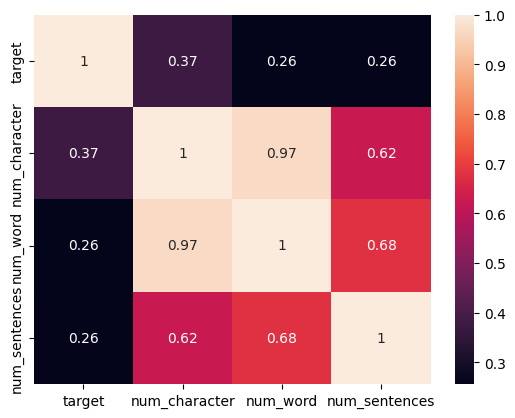

In [16]:
sns.heatmap(email.loc[:, ['target', 'num_character', 'num_word', 'num_sentences']].corr(),annot=True)

<Axes: xlabel='num_character', ylabel='Count'>

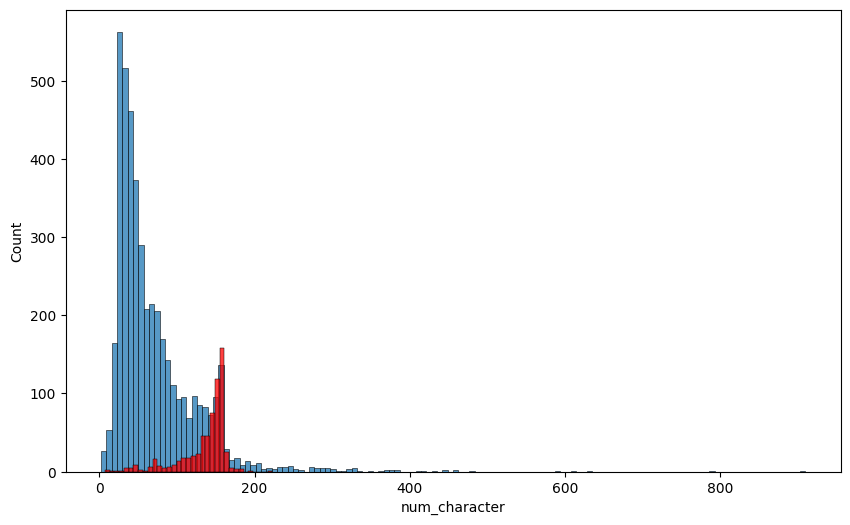

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(email[email['target'] == 0]['num_character'])
sns.histplot(email[email['target'] == 1]['num_character'], color='red')

<Axes: xlabel='num_word', ylabel='Count'>

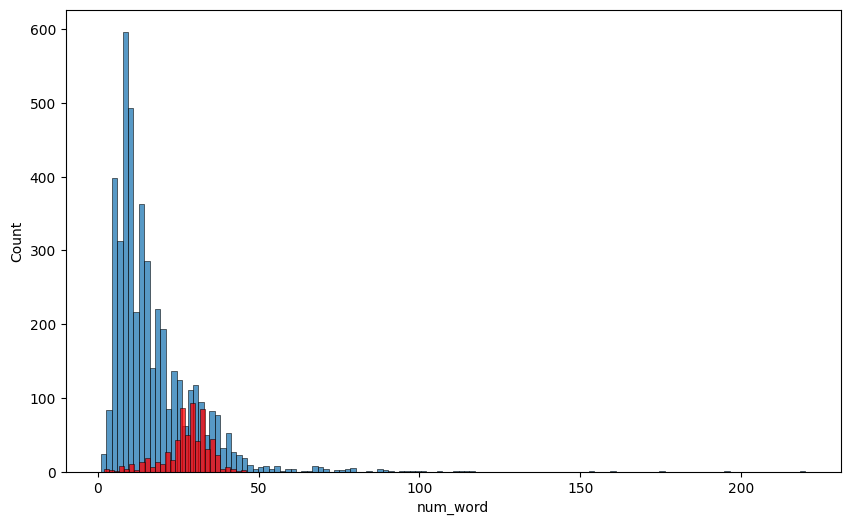

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(email[email['target'] == 0]['num_word'])
sns.histplot(email[email['target'] == 1]['num_word'], color='red')

Untuk kedua Histogram Ham distribusi condong ke kiri artinya semakin banyak orang mengirim pesan dengan jumlah karakternya sedikit di banding dengan spam distribusi condong ke kanan artinya jumlah karakternya memiliki banyak pesan

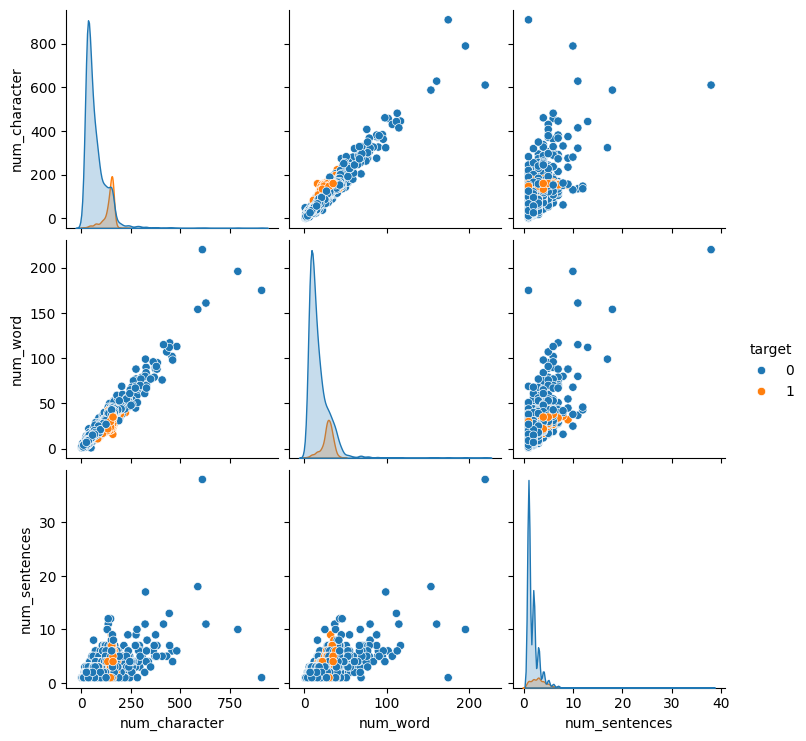

In [19]:
sns.pairplot(email, hue='target')

Dari sini Spam memiliki jumlah kata yang sedikit tetapi memiliki kalimat yang cukup banyak.

# Data Processing

In [20]:
# Change to lowercase
def transform_text(Message):
  Message = Message.lower()
  Message = nltk.word_tokenize(Message)

# remove symbol
  y = []
  for i in Message:
    if i.isalnum():
      y.append(i)

  Message = y[:]
  y.clear()

# remove stopwords
  for i in Message:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

# change to base word
  Message = y[:]
  y.clear()

  for i in Message:
    y.append(ps.stem(i))

  return " ".join(y)

In [21]:
ps = PorterStemmer()
ps.stem('wondering')

'wonder'

In [22]:
transform_text("i wondering your eyes look at the same stars as mine")

'wonder eye look star mine'

In [23]:
email['Message'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [24]:
transform_text(email['Message'][5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [25]:
email['transform_text'] = email['Message'].apply(transform_text)
email.head()

,target,Message,num_character,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [26]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

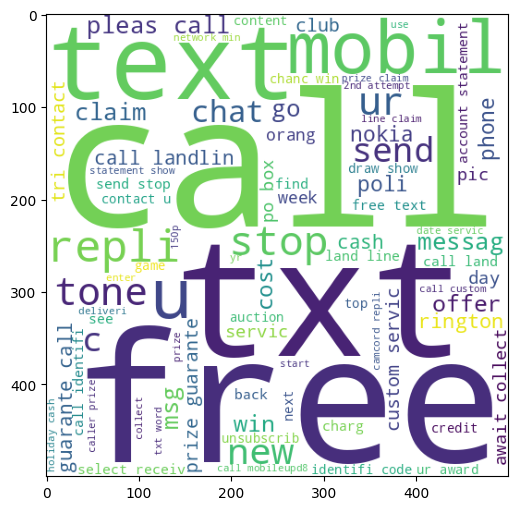

In [27]:
spam_wc = wc.generate(email[email['target']==1]['transform_text'].str.cat(sep=""))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

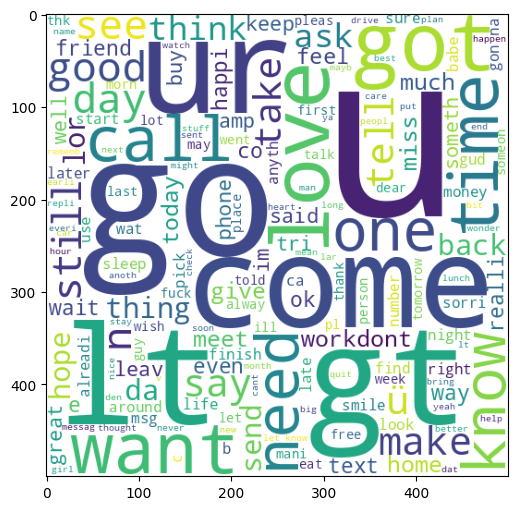

In [28]:
ham_wc = wc.generate(email[email['target']==0]['transform_text'].str.cat(sep=""))
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

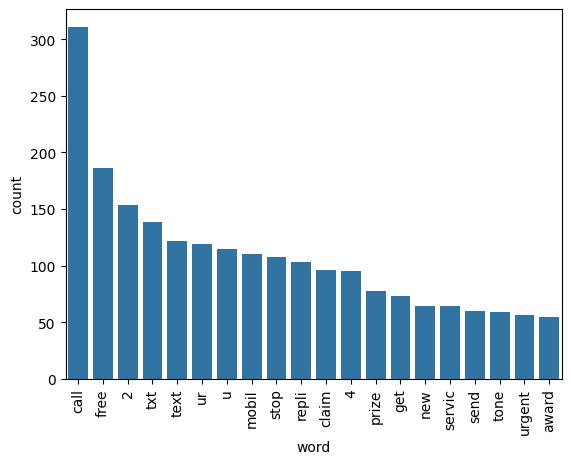

In [29]:
spam_corpus = []
for message in email[email['target'] == 1]['transform_text'].tolist():
  for word in message.split():
    spam_corpus.append(word)

spam_freq = Counter(spam_corpus).most_common(20)
spam_df = pd.DataFrame(spam_freq, columns=["word", "count"])

sns.barplot(x="word", y="count", data=spam_df)
plt.xticks(rotation=90)
plt.show()

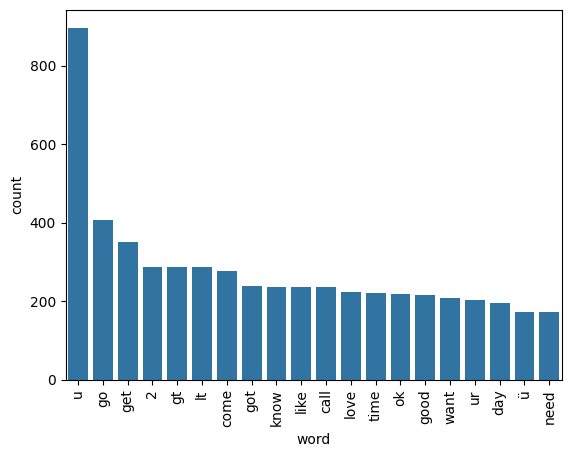

In [30]:
ham_corpus = []
for message in email[email['target'] == 0]['transform_text'].tolist():
  for word in message.split():
    ham_corpus.append(word)

ham_freq = Counter(ham_corpus).most_common(20)
ham_df = pd.DataFrame(ham_freq, columns=["word", "count"])

sns.barplot(x="word", y='count', data=ham_df)
plt.xticks(rotation=90)
plt.show()

In [31]:
email.head()

,target,Message,num_character,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [33]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [34]:
x = tfidf.fit_transform(email['transform_text']).toarray()
print(f"{x.shape}\n")
x

(5157, 3000)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
features_names = tfidf.get_feature_names_out()
print(features_names[:20])

['0207' '02073162414' '021' '0578' '07123456789' '07xxxxxxxxx' '0800'
 '08000839402' '08000930705' '08001950382' '0845' '0870' '08701417012'
 '08707509020' '08712300220' '08712405020' '08712460324' '08715705022'
 '08718720201' '09050090044']


In [36]:
y = email['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [38]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC()
lrc = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

In [39]:
def evaluate_model(model, x_test, y_test):
  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return {
      "Accuracy" : accuracy_score(y_test, y_pred),
      "Confusion Matrix" : confusion_matrix(y_test, y_pred),
      "F1-Score" : f1_score(y_test, y_pred),
      "Recall" : recall_score(y_test, y_pred),
      "Precision" : precision_score(y_test, y_pred)
  }
  return result

result = {
    "GaussianNB" : evaluate_model(gnb, x_test, y_test),
    "MultinomialNB" : evaluate_model(mnb, x_test, y_test),
    "BernoulliNB" : evaluate_model(bnb, x_test, y_test),
    "SVC" : evaluate_model(svc, x_test, y_test),
    "Logistic Regression" : evaluate_model(lrc, x_test, y_test),
    "Decision Tree" : evaluate_model(dtc, x_test, y_test),
    "Random Forest" : evaluate_model(rfc, x_test, y_test),
    "KNeighbors" : evaluate_model(knc, x_test, y_test),
    "Ada Boost" : evaluate_model(abc, x_test, y_test),
    "Bagging" : evaluate_model(bc, x_test, y_test),
    "Extra Tree" : evaluate_model(etc, x_test, y_test),
    "Gradient Bossting" : evaluate_model(gbc, x_test, y_test),
    "XGB" : evaluate_model(xgb, x_test, y_test)
}

In [40]:
rows = []
for model_name, metrics in result.items():
  rows.append({
      'Model' : model_name,
      'Accuracy' : metrics['Accuracy'],
      'Confusion Matrix' : metrics['Confusion Matrix'],
      'F1-Score' : metrics['F1-Score'],
      'Recall' : metrics['Recall'],
      'Precission' : metrics['Precision']
  })

evaluate_classifier = pd.DataFrame(columns=['Model', 'Accuracy', 'Confusion Matrix', 'F1-Score', 'Recall', 'Precision' ])
evaluate_classifier = pd.DataFrame(rows)
evaluate_classifier

,Model,Accuracy,Confusion Matrix,F1-Score,Recall,Precission
0,GaussianNB,0.882752,"[[790, 106], [15, 121]]",0.666667,0.889706,0.533040
1,MultinomialNB,0.976744,"[[895, 1], [23, 113]]",0.904000,0.830882,0.991228
2,BernoulliNB,0.985465,"[[894, 2], [13, 123]]",0.942529,0.904412,0.984000
3,SVC,0.974806,"[[893, 3], [23, 113]]",0.896825,0.830882,0.974138
4,Logistic Regression,0.960271,"[[893, 3], [38, 98]]",0.827004,0.720588,0.970297
5,Decision Tree,0.955426,"[[872, 24], [22, 114]]",0.832117,0.838235,0.826087
6,Random Forest,0.977713,"[[893, 3], [20, 116]]",0.909804,0.852941,0.974790
7,KNeighbors,0.913760,"[[896, 0], [89, 47]]",0.513661,0.345588,1.000000
8,Ada Boost,0.920543,"[[874, 22], [60, 76]]",0.649573,0.558824,0.775510
9,Bagging,0.964147,"[[881, 15], [22, 114]]",0.860377,0.838235,0.883721


In [41]:
performance_model = evaluate_classifier.iloc[:, [0, 1, 3 ,4, 5]]
performance_model.head()

,Model,Accuracy,F1-Score,Recall,Precission
0,GaussianNB,0.882752,0.666667,0.889706,0.533040
1,MultinomialNB,0.976744,0.904000,0.830882,0.991228
2,BernoulliNB,0.985465,0.942529,0.904412,0.984000
3,SVC,0.974806,0.896825,0.830882,0.974138
4,Logistic Regression,0.960271,0.827004,0.720588,0.970297


In [42]:
classifier_value = pd.melt(performance_model, id_vars='Model')
classifier_value.head()

,Model,variable,value
0,GaussianNB,Accuracy,0.882752
1,MultinomialNB,Accuracy,0.976744
2,BernoulliNB,Accuracy,0.985465
3,SVC,Accuracy,0.974806
4,Logistic Regression,Accuracy,0.960271


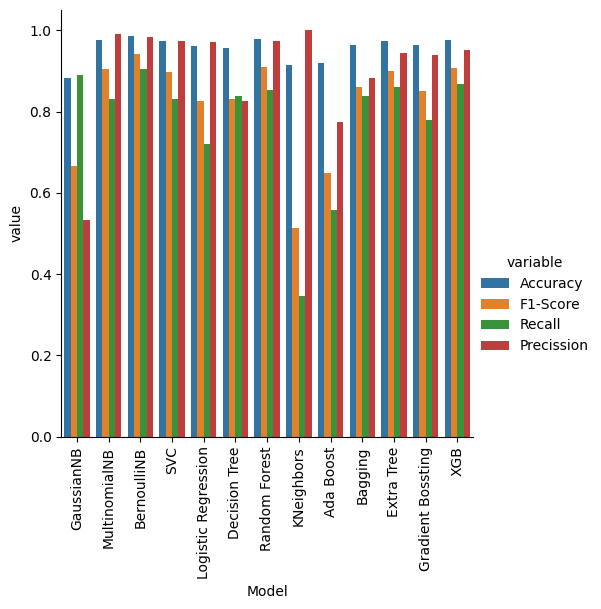

In [43]:
sns.catplot(data=classifier_value, x='Model', y='value', hue='variable', kind='bar')
plt.xticks(rotation=90)
plt.show()

In [46]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(bnb, open("model.pkl", "wb"))